In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
sns.set()
sns.set_style('dark')

In [2]:
save_dir = '/home/smarda/Writing/BodyTweetsPaper/figures/'

In [3]:
tweets_path = '/dlabdata1/smarda/private_data/master/tweets_with_scores.parquet.gzip'
emotions = ['joy', 'surprise', 'fear', 'anger', 'sadness', 'disgust']
colors = ['royalblue','cornflowerblue', 'brown','gold', 'darkorange','darkgoldenrod']
tab_colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown']

In [4]:
tweets_df = pd.read_parquet('/dlabdata1/smarda/private_data/master/tweets_with_scores.parquet.gzip')
tweets_df.head()

,author_id,tweet_id,tweet_text,created_at,next_token,final_state,joy,surprise,fear,anger,sadness,disgust,tokens,vader_score
0,193851688,295969488942288896,It's literally like knives are being plunged i...,2013-01-28 18:59:59+00:00,1jzu9lk96gu5npvzzymnrxxn1nib59kz0vmizbbxmfst,Nebraska,0.050008,0.029231,0.125249,0.050691,0.412114,0.332706,"[It's, literally, like, knives, are, being, pl...",0.3612
1,110575831,295969488120201216,The whole right side of my body hurts.,2013-01-28 18:59:59+00:00,1jzu9lk96gu5npvzzymnrxxn1nib59kz0vmizbbxmfst,Puerto Rico,0.021590,0.004403,0.034428,0.039123,0.760874,0.139582,"[The, whole, right, side, of, my, body, hurts,...",-0.4767
2,61044794,295969487172280322,Great @BikramYoga_rva class ;) my body needed it,2013-01-28 18:59:59+00:00,1jzu9lk96gu5npvzzymnrxxn1nib59kz0vmizbbxmfst,Florida,0.720429,0.016701,0.055441,0.016712,0.125736,0.064981,"[Great, @BikramYoga_rva, class, ;), my, body, ...",0.7184
3,788084582,295969485700087809,What a great chest &amp; tricep workout with t...,2013-01-28 18:59:58+00:00,1jzu9lk96gu5npvzzymnrxxn1nib59kz0vmizbbxmfst,Texas,0.967715,0.002706,0.014748,0.003146,0.004461,0.007223,"[What, a, great, chest, &, tricep, workout, wi...",0.7405
4,721257134,295969483854589954,"Seriously dude, stop breathing in my face",2013-01-28 18:59:58+00:00,1jzu9lk96gu5npvzzymnrxxn1nib59kz0vmizbbxmfst,Idaho,0.084153,0.006059,0.024408,0.385894,0.092785,0.406701,"[Seriously, dude, ,, stop, breathing, in, my, ...",-0.4404


In [5]:
start_date = '2017-05-28'
end_date = '2017-06-01'
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_df['created_at'][(tweets_df['created_at'] > start_date) & (tweets_df['created_at'] < end_date)].min()

Timestamp('2017-05-30 19:28:51+0000', tz='UTC')

In [6]:
tweets_df['tweet_id'].shape[0] - tweets_df['tweet_id'].unique().shape[0]

7727

In [7]:
means = pd.DataFrame(np.mean(tweets_df[emotions], axis=0), columns=['emotion_score'])
means['emotion'] = means.index
means

,emotion_score,emotion
joy,0.447855,joy
surprise,0.086843,surprise
fear,0.093379,fear
anger,0.042246,anger
sadness,0.178033,sadness
disgust,0.151644,disgust


In [8]:
means = pd.DataFrame(np.mean(tweets_df[emotions], axis=0), columns=['emotion_score'])
means['emotion'] = means.index
means['dummy'] = 0
pivoted = means.pivot(index='dummy', columns='emotion').reset_index(drop=True)
pivoted.columns = pivoted.columns.get_level_values(1)

total = 0
cum_row = []
for i in range(6):
    cum_row.append(total + pivoted.loc[0,emotions[i]])
    total += pivoted.loc[0,emotions[i]]

pivoted = pivoted.append(pd.Series(cum_row, index=emotions), ignore_index=True)
pivoted = pivoted[emotions]

pivoted['dummy'] = pivoted.index
pivoted.head()

emotion,joy,surprise,fear,anger,sadness,disgust,dummy
0,0.447855,0.086843,0.093379,0.042246,0.178033,0.151644,0
1,0.447855,0.534698,0.628077,0.670323,0.848356,1.000000,1


<Figure size 432x288 with 0 Axes>

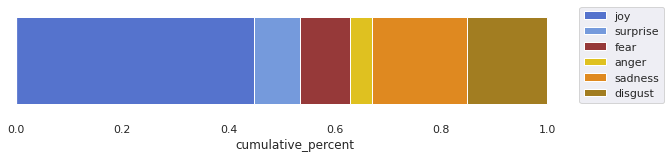

In [9]:
sns.set_style('dark')
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
fig, axs = plt.subplots(1,1, figsize=(10,2));
for i in range(5, -1, -1):
    ax = sns.barplot(y='dummy', x=emotions[i], label=emotions[i], color=colors[i], orient='h', data=pivoted.iloc[[1],:])
ax.set_xlabel('cumulative_percent')
ax.set_ylabel('')
ax.set_facecolor('white')
ax.set_yticklabels([])

handles, labels = ax.get_legend_handles_labels()
lgd = plt.legend(reversed(plt.legend().legendHandles), reversed(labels), bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.savefig(save_dir + 'national_emotions_binary.pdf', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

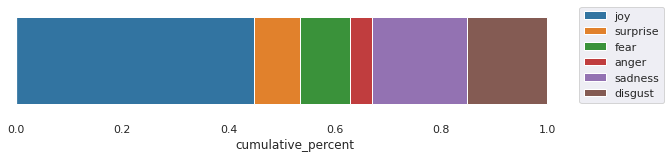

In [11]:
fig, axs = plt.subplots(1,1, figsize=(10,2))
for i in range(5, -1, -1):
    ax = sns.barplot(y='dummy', x=emotions[i], label=emotions[i], color=tab_colors[i], orient='h', data=pivoted.iloc[[1],:])
ax.set_xlabel('cumulative_percent')
ax.set_facecolor('white')
ax.set_ylabel('')
ax.set_yticklabels([])
plt.legend(reversed(plt.legend().legendHandles), reversed(labels), bbox_to_anchor=(1.01, 1), borderaxespad=0)
lgd = plt.legend(reversed(plt.legend().legendHandles), reversed(labels), bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.savefig(save_dir + 'national_emotions_distinct.pdf', dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

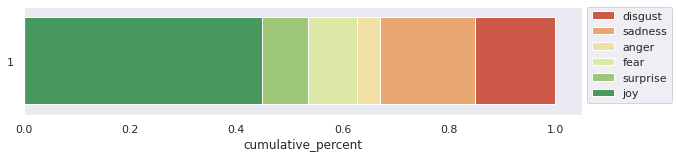

In [12]:
hue_colors = list(sns.color_palette('RdYlGn', n_colors=6))
hue_colors.reverse()
fig, axs = plt.subplots(1,1, figsize=(10,2))
for i in range(5, -1, -1):
    ax = sns.barplot(y='dummy', x=emotions[i], label=emotions[i], color=hue_colors[i], orient='h', data=pivoted.iloc[[1],:])
ax.set_xlabel('cumulative_percent')
ax.set_ylabel(None)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

# Words Melted

In [13]:
with open('../public_data/body_vocab.txt', 'r') as f:
    body_words_list = [word.strip('\n "') for word in f.readlines()]
body_words_list

['eyes',
 'ears',
 'mouth',
 'nose',
 'neck',
 'lips',
 'teeth',
 'chest',
 'breast',
 'breasts',
 'belly',
 'torso',
 'stomach',
 'waist',
 'hips',
 'legs',
 'arms',
 'body',
 'skin',
 'my face',
 'your face',
 'his face',
 'her face',
 'their face']

In [15]:
tqdm.pandas()
tokens_df = tweets_df[['tokens']+emotions].copy()
tokens_df['matched_tokens'] = tokens_df['tokens'].progress_apply(lambda token_list: [w for w in body_words_list if w in token_list])
tokens_df.head()

100%|██████████| 422287/422287 [00:08<00:00, 52473.98it/s]


,tokens,joy,surprise,fear,anger,sadness,disgust,matched_tokens
0,"[It's, literally, like, knives, are, being, pl...",0.050008,0.029231,0.125249,0.050691,0.412114,0.332706,[body]
1,"[The, whole, right, side, of, my, body, hurts,...",0.021590,0.004403,0.034428,0.039123,0.760874,0.139582,[body]
2,"[Great, @BikramYoga_rva, class, ;), my, body, ...",0.720429,0.016701,0.055441,0.016712,0.125736,0.064981,[body]
3,"[What, a, great, chest, &, tricep, workout, wi...",0.967715,0.002706,0.014748,0.003146,0.004461,0.007223,[chest]
4,"[Seriously, dude, ,, stop, breathing, in, my, ...",0.084153,0.006059,0.024408,0.385894,0.092785,0.406701,[my face]


In [16]:
exploded = tokens_df.explode('matched_tokens')
exploded.groupby('matched_tokens').mean().head()

,joy,surprise,fear,anger,sadness,disgust
matched_tokens,,,,,,
arms,0.449642,0.085700,0.093445,0.042364,0.178392,0.150458
belly,0.446144,0.086772,0.093317,0.042585,0.179706,0.151475
body,0.446247,0.087821,0.093196,0.042298,0.178794,0.151644
breast,0.445969,0.085510,0.093128,0.043010,0.179314,0.153069
breasts,0.451698,0.083038,0.092994,0.040512,0.180260,0.151498


In [23]:
melted = pd.melt(tweets_df, id_vars='final_state', value_vars=emotions, var_name='emotion', value_name='score')
melted.head()

,final_state,emotion,score
0,Nebraska,joy,0.050008
1,Puerto Rico,joy,0.021590
2,Florida,joy,0.720429
3,Texas,joy,0.967715
4,Idaho,joy,0.084153


In [24]:
melted['emotion'].unique()

array(['joy', 'surprise', 'fear', 'anger', 'sadness', 'disgust'],
      dtype=object)

In [25]:
melted = pd.melt(tweets_df, id_vars=['tweet_id','final_state'], value_vars=emotions, var_name='emotion', value_name='score')
melted['is_neg'] = melted['emotion'].isin(['fear','anger','sadness','disgust'])
melted.head()

,tweet_id,final_state,emotion,score,is_neg
0,295969488942288896,Nebraska,joy,0.050008,False
1,295969488120201216,Puerto Rico,joy,0.021590,False
2,295969487172280322,Florida,joy,0.720429,False
3,295969485700087809,Texas,joy,0.967715,False
4,295969483854589954,Idaho,joy,0.084153,False


In [30]:
neg_scores = melted[melted['is_neg']].groupby(['tweet_id','final_state']).sum()
neg_scores.head()

,,score,is_neg
tweet_id,final_state,,
1183494899079008258,Florida,0.109717,4
1183494901465571334,Louisiana,0.181272,4
1183494904900661249,Illinois,0.774083,4
1183494907224346624,Massachusetts,0.774083,4
1183494909006929920,Texas,0.774083,4


<AxesSubplot:xlabel='score', ylabel='Count'>

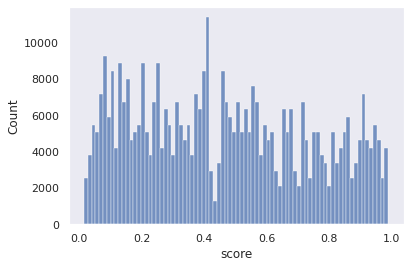

In [31]:
sns.histplot(neg_scores['score'])

In [17]:
list(sns.color_palette('RdYlGn', n_colors=6)).reverse()

<AxesSubplot:ylabel='emotion_score'>

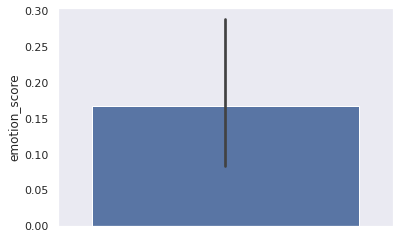

In [18]:
sns.barplot(data = means.reset_index(),y='emotion_score')

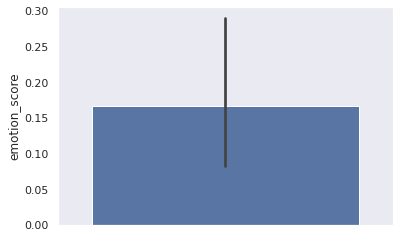

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
bar = sns.barplot(data=means.reset_index(), y='emotion_score')
c = ['red','blue','green','yellow','orange','black']
for i in range(len(c)):
    patches = mpatches.Patch(color=c[i], label=emotions[i])
plt.show()

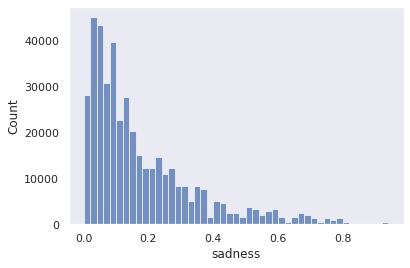

In [20]:
ax = sns.histplot(tweets_df, x="sadness", binwidth=.02)

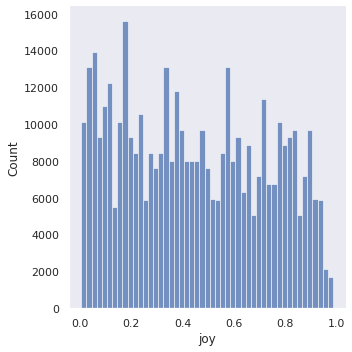

In [21]:
sns.displot(tweets_df, x="joy", binwidth=.02);

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


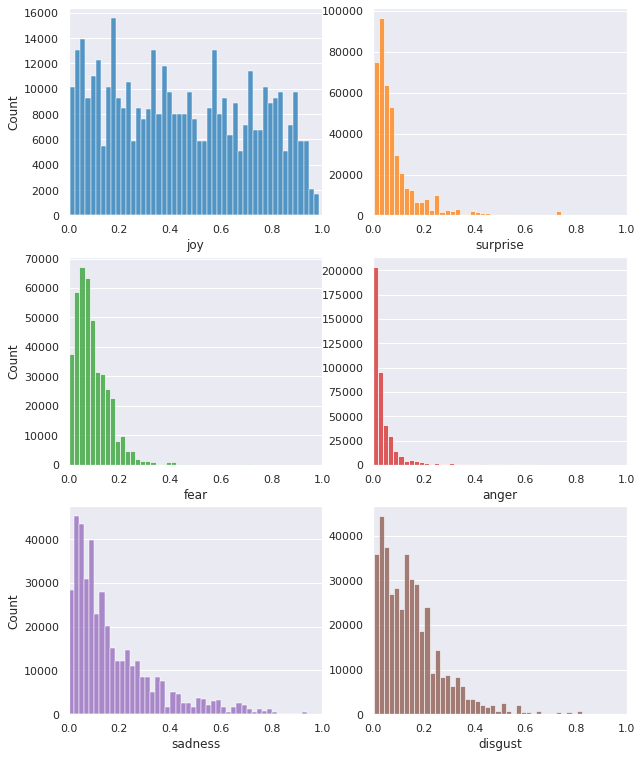

In [35]:
fig, axs = plt.subplots(3, 2, figsize=(10,13))
print(axs.flatten())
for i in range(6):
    ax = axs.flatten()[i]
    ax = sns.histplot(tweets_df, x=emotions[i], binwidth=.02, ax=ax, color=tab_colors[i])
    ax.set_xlim([0,1])
    ax.yaxis.grid()
    if i % 2 == 1:
        ax.set_ylabel('')
plt.savefig(save_dir + 'national_emotions_dists.pdf', dpi=300)
plt.show()

In [27]:
sns.plot(neg_scores['score'])

AttributeError: module 'seaborn' has no attribute 'plot'

In [ ]:
sns.boxplot(data=melted, x='score', y='final_state')

In [ ]:
tweets_df[emotions].describe()

# Counting Tweets

In [ ]:
analysis_df = tweets_df.copy().head()

In [ ]:
analysis_df['max_emotion'] = analysis_df[emotions].idxmax(axis=1)
analysis_df.head()